In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')

In [80]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [81]:
# No duplicated rows
customer_df.loc[df.duplicated() == True]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [82]:
# No NA rows
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [83]:
customer_df.shape

(9134, 24)

In [84]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [85]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [86]:
def column_renamer(df):
    """This function will use the lamba function to first iterate through all column names to bring them to lowercase, and then replace all spaces with _underscores_
    and renames st column to state before returning the updated dataframe."""
    df.columns = [x.lower() for x in df.columns]
    df.columns = df.columns.str.replace(' ', '_')
    return df

In [87]:
customer_df = column_renamer(customer_df)

In [88]:
# looking for ID columns
customer_df.columns
# customer is only ID column that I can identify
customer_df.drop(columns=['customer'], inplace=True)

In [89]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

/var/folders/y3/f9twdr796bj91_x22w2_mf2h0000gn/T/ipykernel_55443/791879803.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [90]:
def cat_and_num_df_splitter(df: pd.DataFrame):
    """
    Function: Splits dataframe into a categorical and numerical dataframes
    Inputs: pandas DataFrame
    Outputs: A categorical dataframe and a numerical dataframe
    """
    df2 = df.copy()
    num_df = df2.select_dtypes(np.number)
    cat_df = df2.select_dtypes(object)
    return cat_df, num_df

In [91]:
categorical_df, numerical_df = cat_and_num_df_splitter(customer_df)

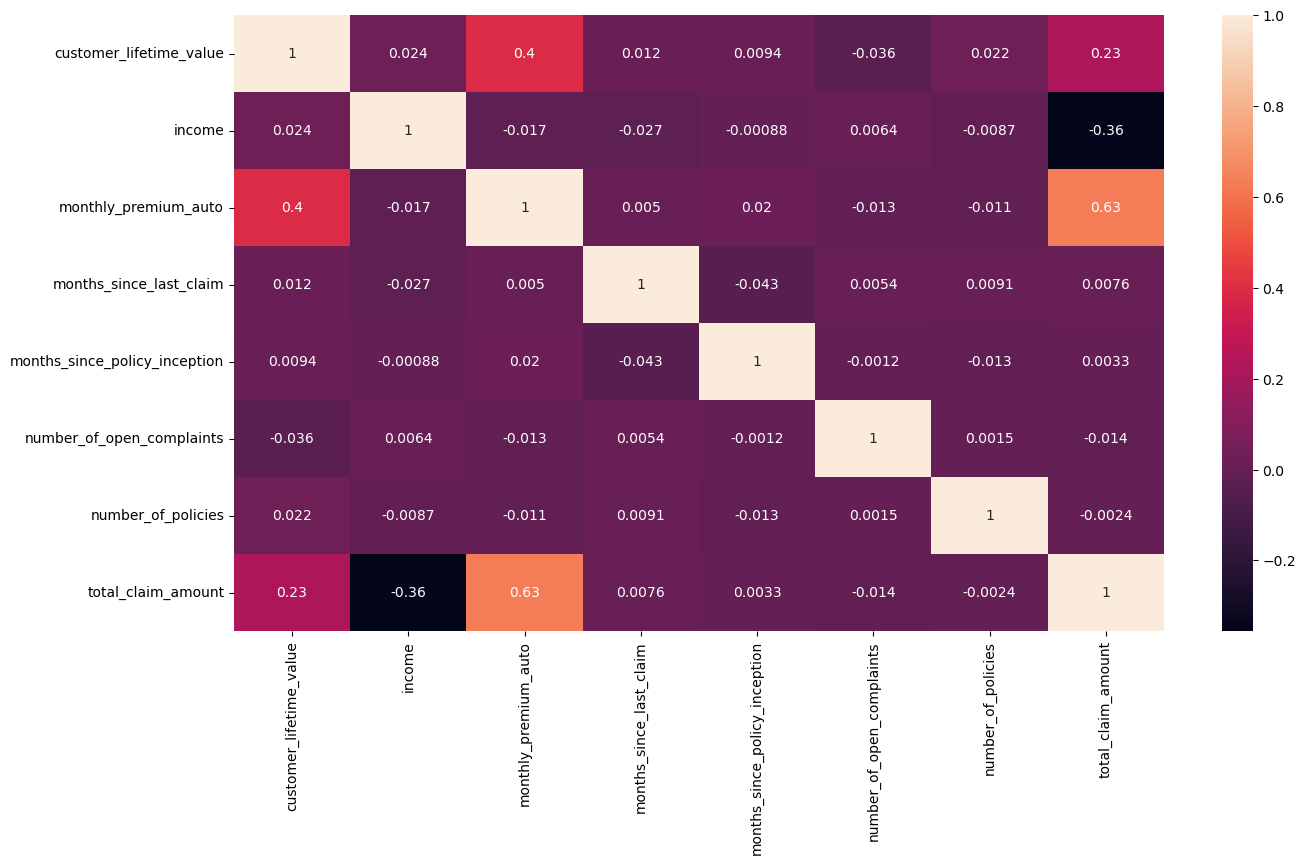

In [92]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

# pair of numerical variables with highest correlation is total_claim_amount
# and monthly_premium_auto. Traditionally if you make higher claims, your
# monthly premiums would also increase, meaning total_claim_amount would
# impact your monthly_premiums. 

In [93]:
def numerical_continuous_discrete_df_splitter(df: pd.DataFrame, unique_value_threshold=36):
    df2 = df.copy()
    df2_discrete = df.copy()
    df2_contin = df.copy()
    for col in df2.columns:
        nunique_values = df2[col].nunique()
        if nunique_values > unique_value_threshold:
            df2_discrete = df2_discrete.drop(columns=[col])
        else:
            df2_contin = df2_contin.drop(columns=[col])
    return df2_discrete, df2_contin

In [94]:
discrete_df, continuous_df = numerical_continuous_discrete_df_splitter(numerical_df)

In [95]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [96]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [110]:
def discrete_df_barplot(df: pd.DataFrame):
    fig, ax = plt.subplots(len(df.columns), 1, figsize=(16,16))
    i = 0
    for col in df.columns:
        sns.barplot(data=df, y=df[col].value_counts().values,
                    x=df[col].value_counts().index ,ax=ax[i])
        ax[i].set_title(col)
        i += 1
    plt.show()

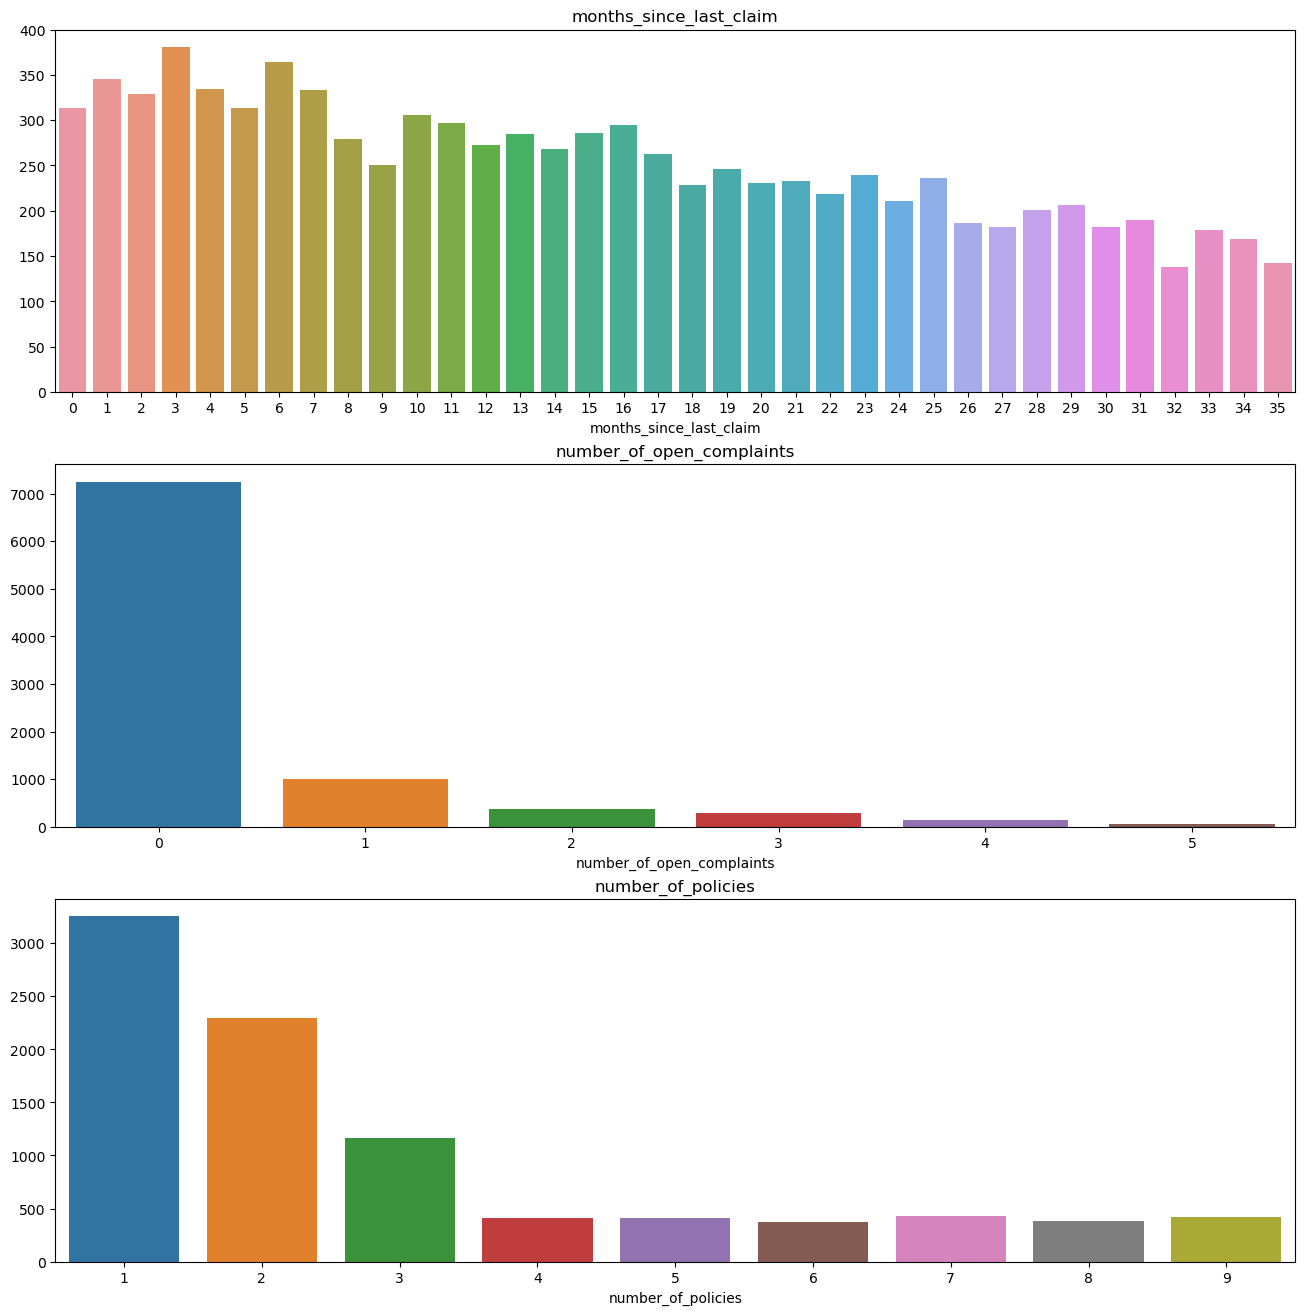

In [111]:
discrete_df_barplot(discrete_df)

In [121]:
def continuous_df_histplot(df: pd.DataFrame):
    fig, ax = plt.subplots(len(df.columns), 1, figsize=(16,20))
    i = 0
    for col in df.columns:
        sns.histplot(df[col] ,ax=ax[i], kde=True)
        i += 1
    plt.show()

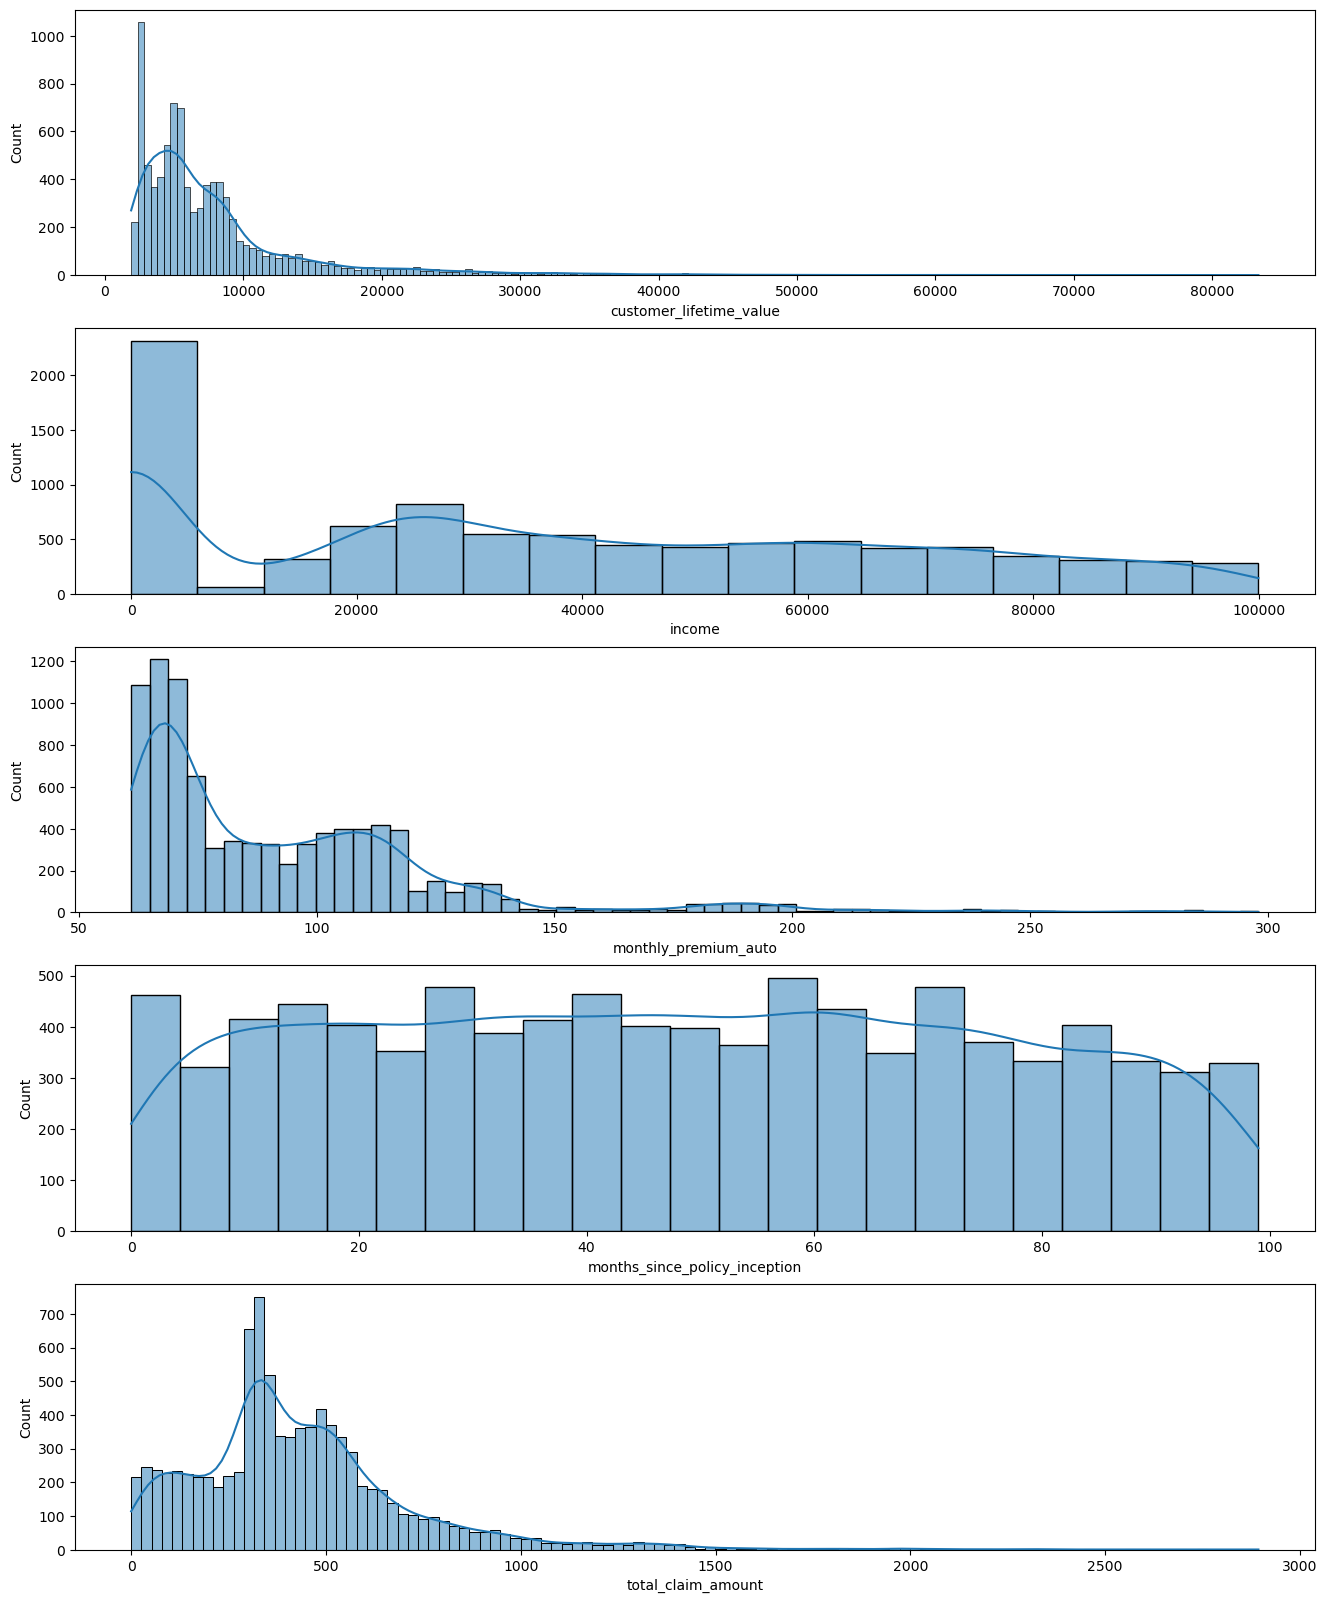

In [122]:
continuous_df_histplot(continuous_df)

In [123]:
# Looking at the histogram plots, I would recommend a log transformation for
# CLV, monthly_premium_auto and total_claim_amount to try and standardise into
# a normal distribution. The same could be said for income. 

In [126]:
def boxplot_continuous_df(df:pd.DataFrame):
    fig, ax = plt.subplots(len(df.columns), 1, figsize=(16,16))
    i = 0
    for col in df.columns:
        sns.boxplot(x=df[col], ax=ax[i])
        i += 1
    plt.show()
    

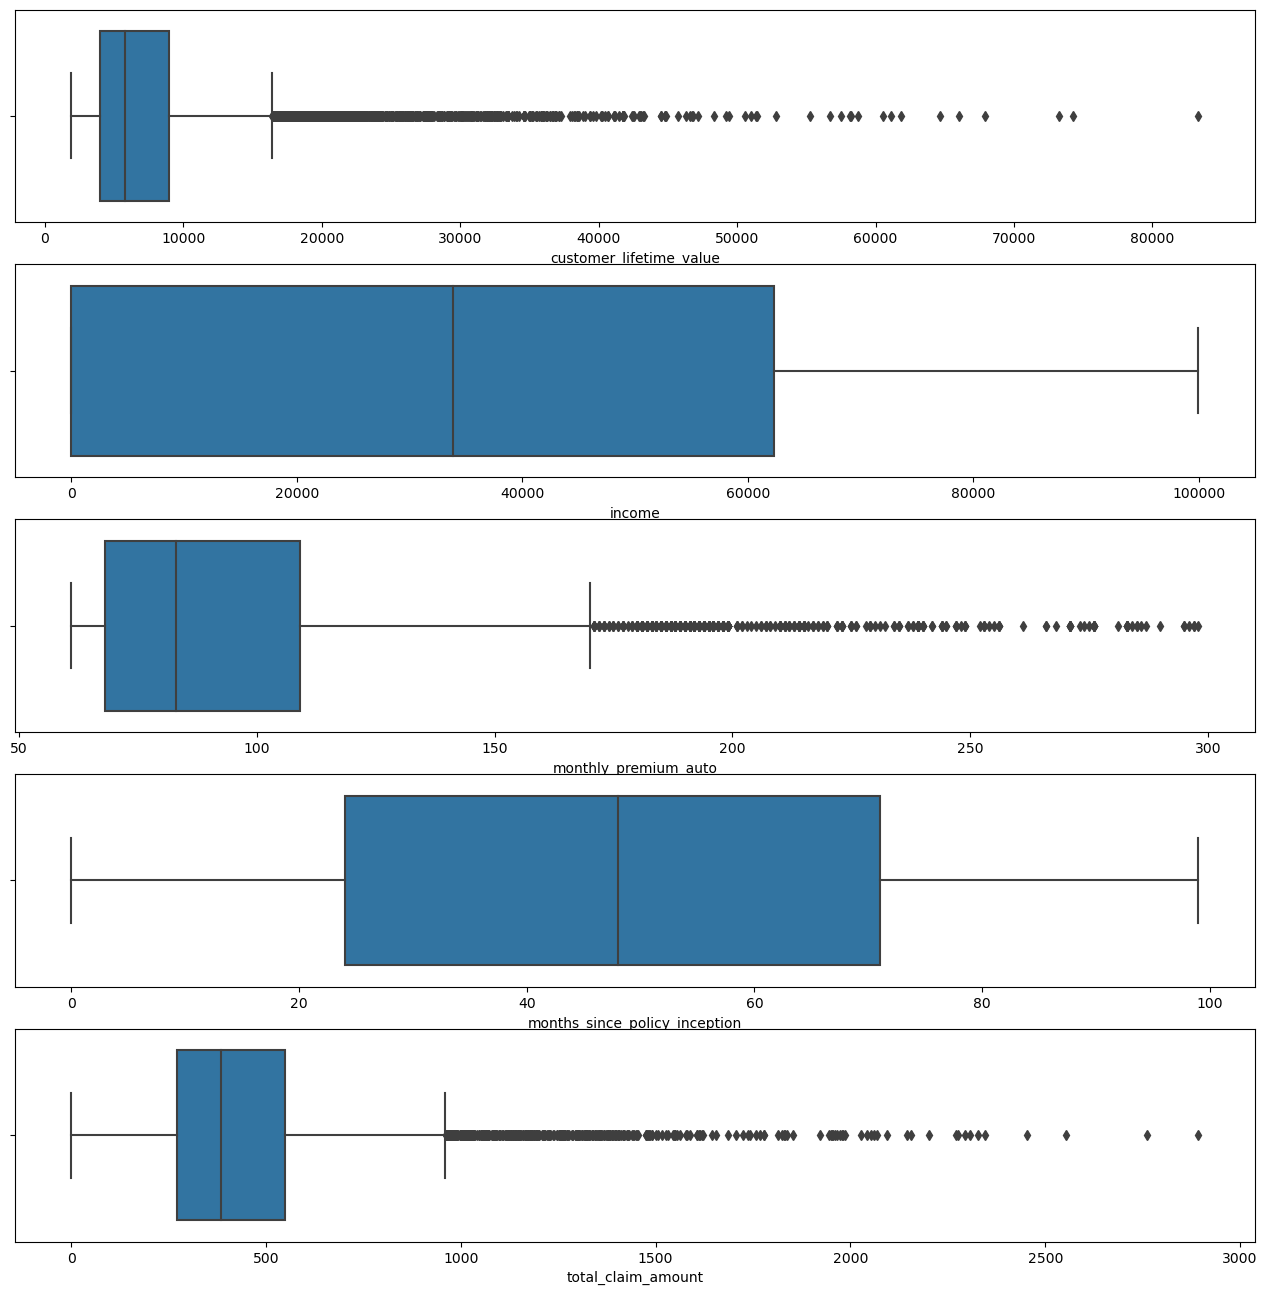

In [127]:
boxplot_continuous_df(continuous_df)

In [ ]:
# Extreme outliers in total_claim_amount, monthly_premium_auto and CLV.